In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [42]:
# Reading s1: base senario: as is
df_s1 = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)
df_s1.drop(['Unnamed: 0'], axis=1, inplace=True)
df_s1.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_s1.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_s1.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_s1.drop(['Unnamed: 0.4'], axis=1, inplace=True)
df_s1.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [43]:
# Reading s2: 100% beb
df_s2 = pd.read_csv(r'../../results/simulated-fuel-rates-100-heb.csv', delimiter=',', skiprows=0, low_memory=False)
df_s2.drop(['Unnamed: 0'], axis=1, inplace=True)
df_s2.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_s2.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_s2.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_s2.drop(['Unnamed: 0.4'], axis=1, inplace=True)
df_s2.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [44]:
# Reading s3: 100% heb
df_s3 = pd.read_csv(r'../../results/simulated-fuel-rates-100-beb.csv', delimiter=',', skiprows=0, low_memory=False)
df_s3.drop(['Unnamed: 0'], axis=1, inplace=True)
df_s3.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_s3.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_s3.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_s3.drop(['Unnamed: 0.4'], axis=1, inplace=True)
df_s3.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [45]:
# Convert gal to kwh
# Check if Powertrain column contains hybrid or conventional
mask1 = (df_s1['Powertrain'] == 'hybrid') | (df_s1['Powertrain'] == 'conventional')
mask2 = (df_s2['Powertrain'] == 'hybrid') | (df_s2['Powertrain'] == 'conventional')
#mask3 = (df_s3['Powertrain'] == 'hybrid') | (df_s3['Powertrain'] == 'conventional')

# Multiply Energy column by 33.7 for selected rows
df_s1.loc[mask1, 'Energy'] *= 33.7
df_s2.loc[mask2, 'Energy'] *= 33.7
#df_s3.loc[mask3, 'Energy'] *= 33.7

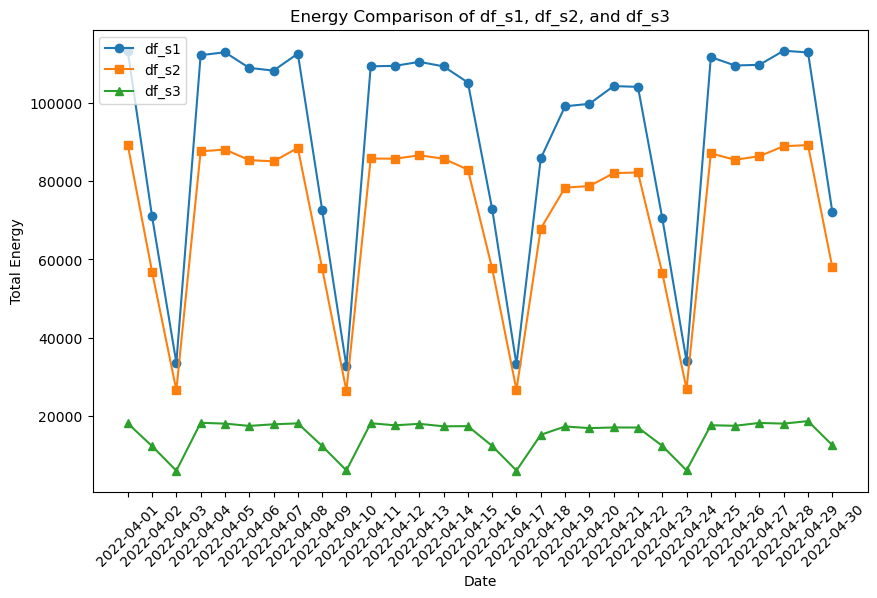

In [46]:
# Groupby 'date' and sum 'energy' in each dataframe
df_s1_grouped = df_s1.groupby('Date')['Energy'].sum()
df_s2_grouped = df_s2.groupby('Date')['Energy'].sum()
df_s3_grouped = df_s3.groupby('Date')['Energy'].sum()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df_s1_grouped.index, df_s1_grouped, label='df_s1', marker='o')
ax.plot(df_s2_grouped.index, df_s2_grouped, label='df_s2', marker='s')
ax.plot(df_s3_grouped.index, df_s3_grouped, label='df_s3', marker='^')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Energy')
ax.set_title('Energy Comparison of df_s1, df_s2, and df_s3')
ax.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()


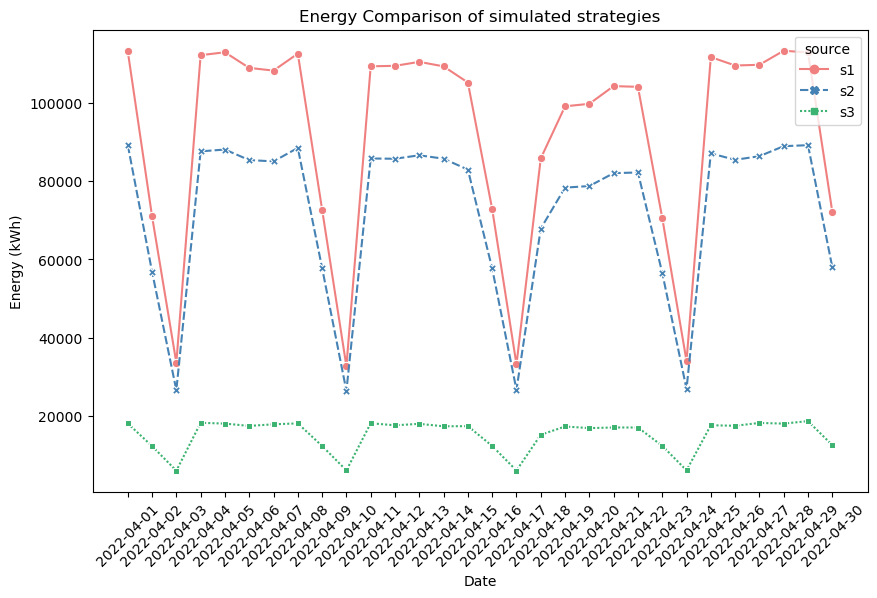

In [52]:
# set the color palette for each powertrain type
# count occurrences of each powertrain type
powertrain_counts = df_s1['Powertrain'].value_counts()
colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

palette = [colors[p] for p in powertrain_counts.index]

# Groupby 'date' and sum 'energy' in each dataframe
df_s1_grouped = df_s1.groupby('Date')['Energy'].sum().reset_index()
df_s2_grouped = df_s2.groupby('Date')['Energy'].sum().reset_index()
df_s3_grouped = df_s3.groupby('Date')['Energy'].sum().reset_index()

# Assign dataframe names
df_s1_grouped['source'] = 's1'
df_s2_grouped['source'] = 's2'
df_s3_grouped['source'] = 's3'

# Combine the grouped dataframes
combined_df = pd.concat([df_s1_grouped, df_s2_grouped, df_s3_grouped])

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Date', y='Energy', hue='source', style='source', markers=True, palette=palette)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.title('Energy Comparison of simulated strategies')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [48]:
df_s1['Energy'].sum()

2757716.0701687853

In [49]:
df_s2['Energy'].sum()

2171616.743020004

In [50]:
df_s3['Energy'].sum()

452670.3525600983

In [55]:
100-df_s2['Energy'].sum()/df_s1['Energy'].sum()*100

21.253070012857023

In [57]:
100-df_s3['Energy'].sum()/df_s1['Energy'].sum()*100

83.58531694191444